In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [166]:
df=pd.read_csv("Admission_Predict.csv")

In [167]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [168]:
df.shape

(400, 9)

In [169]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [170]:
X=df.iloc[:,1:-1]
Y=df.iloc[:,-1]

In [171]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [172]:
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [173]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

In [174]:
X_train_scaled=MinMaxScaler().fit_transform(X_train)
X_test_scaled=MinMaxScaler().fit_transform(X_test)

In [175]:
X_train_scaled

array([[0.38      , 0.57142857, 0.5       , ..., 0.5       , 0.42307692,
        0.        ],
       [0.56      , 0.28571429, 0.25      , ..., 0.625     , 0.55769231,
        1.        ],
       [0.62      , 0.60714286, 0.5       , ..., 0.75      , 0.44871795,
        1.        ],
       ...,
       [0.48      , 0.53571429, 0.25      , ..., 0.75      , 0.47115385,
        0.        ],
       [0.68      , 0.64285714, 0.75      , ..., 0.75      , 0.75320513,
        1.        ],
       [0.8       , 0.78571429, 0.75      , ..., 0.5       , 0.75961538,
        1.        ]])

In [176]:
X_test_scaled

array([[0.7826087 , 0.74074074, 1.        , 1.        , 0.66666667,
        0.76470588, 1.        ],
       [0.41304348, 0.51851852, 0.25      , 0.28571429, 0.        ,
        0.44705882, 1.        ],
       [0.63043478, 0.51851852, 0.5       , 0.57142857, 0.5       ,
        0.46666667, 1.        ],
       [0.39130435, 0.59259259, 0.5       , 0.42857143, 0.33333333,
        0.52156863, 0.        ],
       [0.30434783, 0.48148148, 0.5       , 0.42857143, 0.33333333,
        0.34509804, 0.        ],
       [0.30434783, 0.62962963, 0.75      , 0.57142857, 0.33333333,
        0.48627451, 0.        ],
       [0.60869565, 0.62962963, 0.5       , 0.42857143, 0.5       ,
        0.25098039, 0.        ],
       [0.65217391, 0.77777778, 1.        , 1.        , 0.83333333,
        0.6745098 , 1.        ],
       [0.19565217, 0.18518519, 0.        , 0.14285714, 0.16666667,
        0.11372549, 0.        ],
       [0.10869565, 0.14814815, 0.5       , 1.        , 0.5       ,
        0.11764706, 0. 

In [186]:
model=Sequential()
model.add(Dense(10,activation="relu",input_dim=X_train_scaled.shape[1]))
model.add(Dense(10,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(1,activation="linear"))

In [187]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 10)                80        
                                                                 
 dense_58 (Dense)            (None, 10)                110       
                                                                 
 dense_59 (Dense)            (None, 5)                 55        
                                                                 
 dense_60 (Dense)            (None, 1)                 6         
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [188]:
model.compile(loss="mean_squared_error",optimizer="Adam")

In [189]:
history=model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 15ms/step - loss: 0.2817 - val_loss: 0.2408
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2065 - val_loss: 0.1672
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1395 - val_loss: 0.1051
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0857 - val_loss: 0.0575
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0463 - val_loss: 0.0265
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0232 - val_loss: 0.0117
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0132 - val_loss: 0.0079
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0116 - val_loss: 0.0083
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0116 - val_loss: 0.0082
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0110 - val_loss: 0.0076
Epoch 11/100
8/8 [==========

8/8 [==============================] - 0s 5ms/step - loss: 0.0043 - val_loss: 0.0049
Epoch 85/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0049
Epoch 86/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0042 - val_loss: 0.0048
Epoch 87/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0049
Epoch 88/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0048
Epoch 89/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0048
Epoch 90/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0048
Epoch 91/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0048
Epoch 92/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0042 - val_loss: 0.0049
Epoch 93/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0048
Epoch 94/100
8/8 [===============

In [190]:
from sklearn.metrics import r2_score

In [191]:
Y_pred=model.predict(X_test_scaled)

3/3 [==============================] - 0s 1ms/step


In [192]:
r2_score(Y_test,Y_pred)

0.6114814004250391

In [193]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

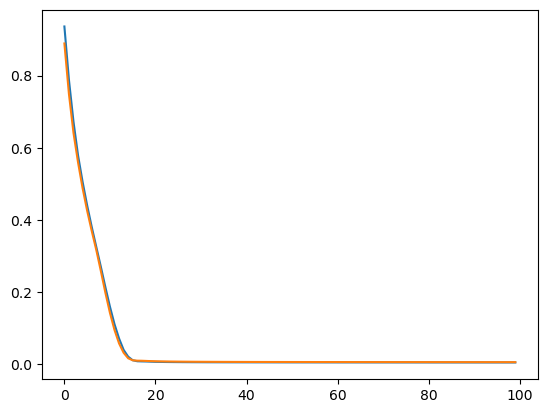

In [185]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
